-------------1------------


#TR
**Age (Yaş):** Sigorta yaptıran kişinin yaşı. Yaş arttıkça sağlık riskleri de artar.

**Sex (Cinsiyet):**  Sigorta yaptıranın cinsiyeti (erkek/kadın).

BMI (Vücut Kitle İndeksi): Kişinin kilo ve boyuna göre hesaplanan sağlık göstergesi.

Children (Çocuk Sayısı): Sigorta kapsamındaki çocuk sayısı.

Smoker (Sigara Kullanımı): Sigara içip içmediği bilgisi. Sigara içmek, sağlık risklerini ciddi şekilde artırır.

Region (Bölge): Kişinin yaşadığı coğrafi bölge (northeast, northwest, southeast, southwest).

Charges (Sigorta Ücreti): Sağlık sigortası için ödenen prim miktarı (hedef değişken).


---

#eng
Age: The age of the person purchasing insurance. As age increases, health risks also increase.

Sex: The gender of the insured individual (male/female).

BMI (Body Mass Index): A health indicator calculated based on a person’s weight and height.

Children: The number of children covered by the insurance.

Smoker: Indicates whether the person smokes. Smoking significantly increases health risks.

Region: The geographic region where the person lives (northeast, northwest, southeast, southwest).

Charges: The insurance premium paid for health insurance (target variable).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns


data = pd.read_csv('/content/drive/MyDrive/polinomsal regresyon/insurance.csv')
display(data.head())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [ ]:
data.shape

(1338, 7)

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

print("Kategorik Değişkenler:", categorical_features)
print("Sayısal Değişkenler:", numerical_features)

Kategorik Değişkenler: ['sex', 'smoker', 'region']
Sayısal Değişkenler: ['age', 'bmi', 'children']


sayısal ve kategorik değişkenleri ayırdık.


In [ ]:
# Sayısallar standardize ediliyor
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Kategorikler one hot encoding
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Interaction features ekleyelim
if 'smoker_yes' in data.columns:
    data['smoker_yes_age'] = data['smoker_yes'] * data['age']
    data['smoker_yes_bmi'] = data['smoker_yes'] * data['bmi']

X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,smoker_yes_age,smoker_yes_bmi
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True,-1.438764,-0.45332
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False,-0.000000,0.00000
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False,-0.000000,0.00000
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False,-0.000000,-0.00000
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False,-0.000000,-0.00000


---------------------2--------------------

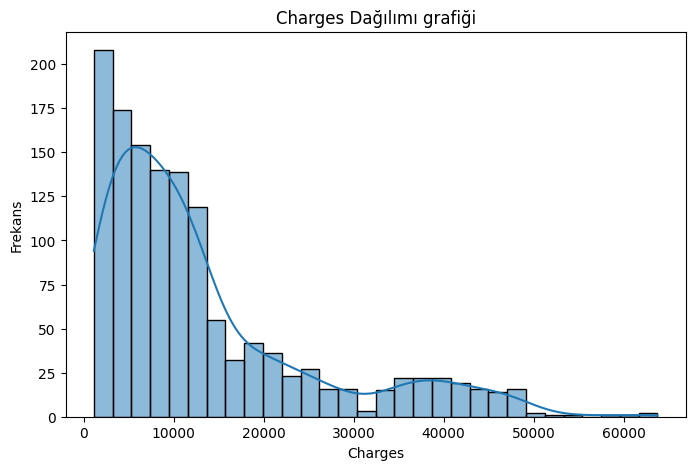

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], kde=True)
plt.title('Charges Dağılımı grafiği')
plt.xlabel('Charges')
plt.ylabel('Frekans')
plt.show()


Since I observed a high correlation related to smoking, I wanted to apply feature engineering and re-examine the data. As a result, I observed that the R² value increased and the MSE decreased in linear regression. Before feature engineering, when applying polynomial regression, I observed that the optimal degree was 2. However, after feature engineering, I found that this was no longer necessary and that a degree of 1 was sufficient. This also reduced the risk of overfitting. Our model is learning in a more natural way :P

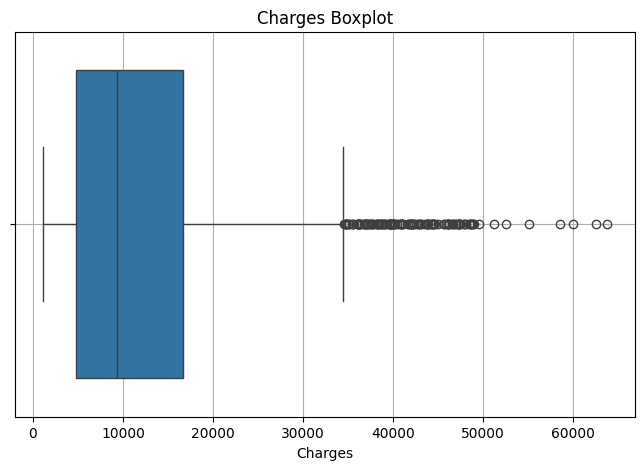

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['charges'])
plt.title('Charges Boxplot')
plt.xlabel('Charges')
plt.grid(True)
plt.show()


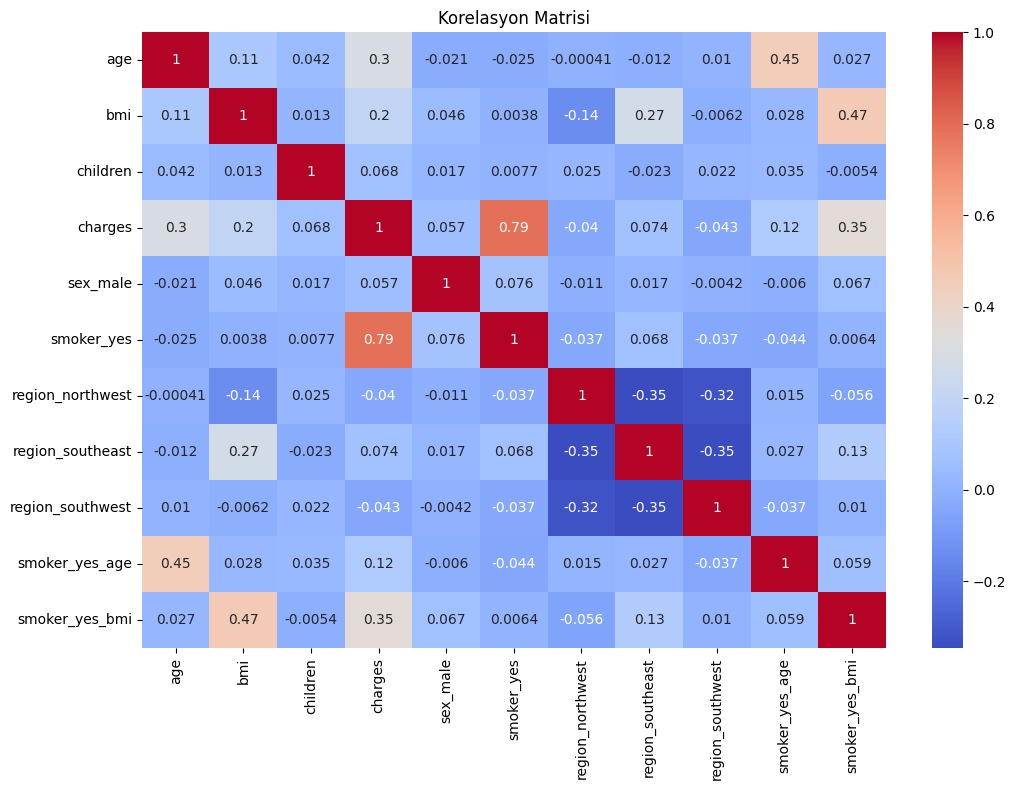

In [ ]:
# Korelasyon matrisi
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Korelasyon Matrisi')
plt.show()

There is a strong relationship between smoking status and charges. In addition, although not as strong, there also appears to be a correlation with age and body mass index (BMI). (Seriously, don’t smoke.)

-----------------3-------------------

In [ ]:
# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Lineer regresyon
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Performans değerlendirmesi
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Lineer Regresyon: MSE={mse_lin:.2f}, R²={r2_lin:.2f}")

Lineer Regresyon: MSE=20922607.94, R²=0.87


I split the data into training and test sets and performed linear regression. Since I benefited from feature engineering, the R² value turned out to be quite good.

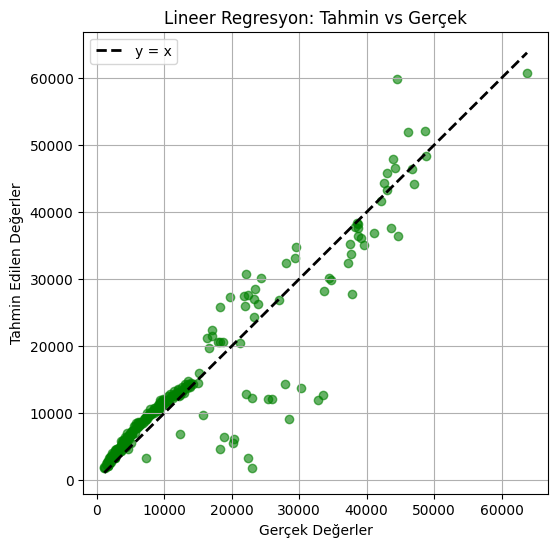

In [ ]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='y = x')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Lineer Regresyon: Tahmin vs Gerçek")
plt.legend()
plt.grid(True)
plt.show()

Although there is some deviation at higher values, there is a clear clustering along the x = y line at lower values. As observed in the graph, there is no need to apply a polynomial transformation to the feature-engineered data.

------------------4------------------

In [ ]:
# charges değişkenine log dönüşümü
data['log_charges'] = np.log(data['charges'])

# Bağımlı değişken olarak log_charges kullanalım
X_loglu = data.drop(['charges', 'log_charges'], axis=1)
y_log = data['log_charges']

# Eğitim ve test setine ayır
X_loglu_train, X_loglu_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Yeni lineer model
lr_log = LinearRegression()
lr_log.fit(X_loglu_train, y_train_log)

# Tahmin
y_pred_log = lr_log.predict(X_loglu_test)

# Performans
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print(f"Log Dönüşümlü Lineer Regresyon MSE: {mse_log}")
print(f"Log Dönüşümlü Lineer Regresyon R²: {r2_log}")


Log Dönüşümlü Lineer Regresyon MSE: 0.1315547161961723
Log Dönüşümlü Lineer Regresyon R²: 0.8536883921349919


After the logarithmic transformation, the linear regression model still performs well, but the R² value without the log transformation was higher.

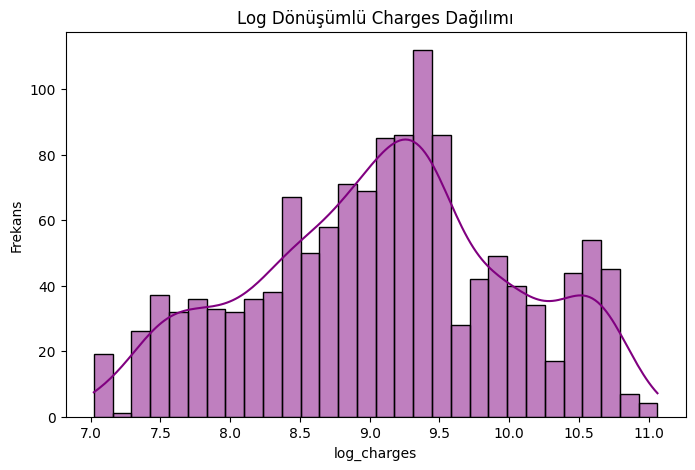

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(data['log_charges'], kde=True, bins=30, color='purple')
plt.title('Log Dönüşümlü Charges Dağılımı')
plt.xlabel('log_charges')
plt.ylabel('Frekans')
plt.show()

With the logarithmic transformation, the distribution becomes more symmetric and closer to a normal shape.

-----------------5----------------

In [ ]:
# Polinomsal özellikler ekleyerek modeli zenginleştirme
degrees = range(1, 5)  # 1'den 4'e kadar farklı polinom derecelerini dene
best_degree = None
best_mse = float("inf")
best_r2 = None
mse_values = []
r2_values = []

In [ ]:
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Polinomsal Regresyon
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)
    y_pred_poly = lr_poly.predict(X_test_poly)

    # Performans ölçümleri
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    mse_values.append(mse_poly)
    r2_values.append(r2_poly)

    print(f"Polinom (d={degree}): MSE={mse_poly:.2f}, R²={r2_poly:.2f}")


    # En iyi dereceyi belirleme
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_r2 = r2_poly
        best_degree = degree

print(f"\nEn iyi Polinomsal Derece: {best_degree}")
print(f"Polinomsal Regresyon (d={best_degree}): MSE={best_mse:.2f}, R²={best_r2:.2f}")


Polinom (d=1): MSE=20922607.94, R²=0.87
Polinom (d=2): MSE=22033207.97, R²=0.86
Polinom (d=3): MSE=32246999.62, R²=0.79
Polinom (d=4): MSE=91527147.42, R²=0.41

En iyi Polinomsal Derece: 1
Polinomsal Regresyon (d=1): MSE=20922607.94, R²=0.87


In [ ]:
# YENİDEN: Log dönüşümlü veri kullanıyoruz
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)

    # EĞİTİM ve TEST verilerini log'lu X'lerden oluşturuyoruz
    X_train_poly = poly.fit_transform(X_loglu_train)  # X_loglu_train kullandık
    X_test_poly = poly.transform(X_loglu_test)        # X_loglu_test kullandık

    # Polinomsal Regresyon
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train_log)  # Y log'lu: y_train_log kullandık
    y_pred_poly = lr_poly.predict(X_test_poly)

    # Performans ölçümleri
    mse_poly = mean_squared_error(y_test_log, y_pred_poly)  # y_test_log ile test ediyoruz
    r2_poly = r2_score(y_test_log, y_pred_poly)

    mse_values.append(mse_poly)
    r2_values.append(r2_poly)

    print(f"Polinom (d={degree}): MSE={mse_poly:.4f}, R²={r2_poly:.4f}")

    # En iyi dereceyi belirleme
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_r2 = r2_poly
        best_degree = degree

print(f"\nEn iyi Polinomsal Derece: {best_degree}")
print(f"Polinomsal Regresyon (d={best_degree}): MSE={best_mse:.4f}, R²={best_r2:.4f}")


Polinom (d=1): MSE=0.1316, R²=0.8537
Polinom (d=2): MSE=0.1242, R²=0.8619
Polinom (d=3): MSE=0.1393, R²=0.8451
Polinom (d=4): MSE=0.2229, R²=0.7521

En iyi Polinomsal Derece: 2
Polinomsal Regresyon (d=2): MSE=0.1242, R²=0.8619


In the two codes above, I demonstrated how to determine the polynomial degree both using logarithmic-transformed data and using the original (non-logarithmic) data. When the polynomial degree is selected based on the logarithmic-transformed data, the R² value decreases and the optimal degree turns out to be 2. On the other hand, when the polynomial degree is determined using the non-logarithmic data, the optimal degree is 1, which corresponds to a directly linear model.

In [ ]:
# 2. Polinomsal regresyon (d=2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)  # Eğitim verisi için polinomsal özellikler
X_test_poly = poly_features.transform(X_test)  # Test verisi için polinomsal özellikler

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polinomsal Regresyon (d=2): MSE={mse_poly:.2f}, R²={r2_poly:.2f}")

Polinomsal Regresyon (d=2): MSE=22033207.97, R²=0.86


Due to feature engineering, this step is not strictly necessary, but I wanted to include it anyway. The model performs better when the polynomial degree is 1. I only wanted to demonstrate what happens when the degree is increased to 2.

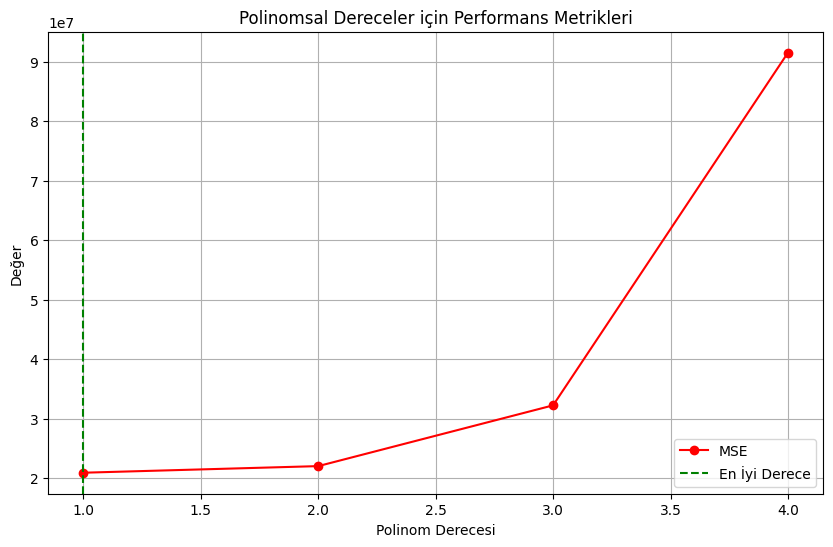

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_values[:len(degrees)], marker='o', label="MSE", color="red")
plt.axvline(degrees[r2_values[:len(degrees)].index(max(r2_values[:len(degrees)]))],
            color="green", linestyle="--", label="En İyi Derece")
plt.title("Polinomsal Dereceler için Performans Metrikleri")
plt.xlabel("Polinom Derecesi")
plt.ylabel("Değer")
plt.legend()
plt.grid()
plt.show()


As observed in the graph, when the polynomial degree is around 1, the MSE appears to be at its optimal (lowest) value.

RİDGE / LASSo
------------------------6---------------------

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Sabit Alfa Değeri
alpha = 20

# Lasso modelini oluştur
lasso = Lasso(alpha=alpha, max_iter=10000)

# Modeli eğit
lasso.fit(X_train, y_train)

# Test setinde tahmin yapma
y_pred_lasso = lasso.predict(X_test)

# Performans değerlendirmesi
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Sonuçları yazdır
print(f"Lasso Modeli (Alpha: {alpha}):")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R^2 Skoru: {r2_lasso:.2f}")

# Lasso Katsayılarını yazdır
print("Lasso Katsayıları:", lasso.coef_)

Lasso Modeli (Alpha: 20):
Mean Squared Error (MSE): 20949072.32
R^2 Skoru: 0.87
Lasso Katsayıları: [ 3679.35219962   105.86081529   538.92162133  -427.51937977
 23761.76570954  -302.5913315   -613.38137107  -894.69094291
     0.          8846.35091218]


At the beginning, I wanted to manually assign the alpha value for Ridge and Lasso and directly observe the results. I applied this directly using X_train and X_test. No logarithmic transformations or similar preprocessing steps were used. In this case, the R² value turned out to be quite high.

The same situation is also valid for the Lasso model below; however, the R² value of Lasso is slightly lower.

In [ ]:
# Sabit Alfa Değeri
alpha = 20

# Ridge modelini oluştur
ridge = Ridge(alpha=alpha)

# Modeli eğit
ridge.fit(X_train, y_train)

# Test setinde tahmin yapma
y_pred_ridge = ridge.predict(X_test)

# Performans değerlendirmesi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Sonuçları yazdır
print(f"Ridge Modeli (Alpha: {alpha}):")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R^2 Skoru: {r2_ridge:.2f}")

# Ridge Katsayılarını yazdır
print("Ridge Katsayıları:", ridge.coef_)


Ridge Modeli (Alpha: 20):
Mean Squared Error (MSE): 21718338.04
R^2 Skoru: 0.86
Ridge Katsayıları: [ 3.56937594e+03  3.10674985e+02  5.63994269e+02 -3.04529864e+02
  2.13861086e+04 -4.74980226e+02 -6.44002428e+02 -1.01148861e+03
  1.81868878e+01  7.99016563e+03]


**alphayı otomatik belirlemeyle ridge/lasso**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge için alpha aralığı (0.001 ile 100 arası logaritmik dağılım)
ridge_params = {'alpha': np.logspace(0.001, 100, 100)}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)

# Log dönüşümlü hedef ile eğit
ridge_grid.fit(X_loglu_train, y_train_log)

# En iyi modeli al
best_ridge = ridge_grid.best_estimator_

# Log ölçekte tahmin
y_pred_log_ridge = best_ridge.predict(X_loglu_test)

# Log skala değerlendirme
mse_log_ridge = mean_squared_error(y_test_log, y_pred_log_ridge)
r2_log_ridge = r2_score(y_test_log, y_pred_log_ridge)

# Orijinal ölçeğe dönüşüm
y_pred_ridge_exp = np.exp(y_pred_log_ridge)
y_test_exp = np.exp(y_test_log)

# Orijinal skala değerlendirme
mse_exp_ridge = mean_squared_error(y_test_exp, y_pred_ridge_exp)
r2_exp_ridge = r2_score(y_test_exp, y_pred_ridge_exp)

# Sonuçları yazdır
print("Ridge Regresyon (Log Skala):")
print(f"En iyi Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Log MSE: {mse_log_ridge:.2f}")
print(f"Log R²: {r2_log_ridge:.2f}")

print("\n Ridge Regresyon (Orijinal Skala - exp dönüşümü):")
print(f"Orijinal MSE: {mse_exp_ridge:.2f}")
print(f"Orijinal R²: {r2_exp_ridge:.2f}")


Ridge Regresyon (Log Skala):
En iyi Alpha: 1.0023052380778996
Log MSE: 0.13
Log R²: 0.85

 Ridge Regresyon (Orijinal Skala - exp dönüşümü):
Orijinal MSE: 28415376.49
Orijinal R²: 0.82


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Lasso için alpha değerleri (daha geniş aralık ama log ölçekte)
lasso_params = {'alpha': np.logspace(-3, 2, 100)}
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)

# Log dönüşümlü hedefle eğit
lasso_grid.fit(X_loglu_train, y_train_log)

# En iyi modeli seç
best_lasso = lasso_grid.best_estimator_

# Tahmin (log skala)
y_pred_log_lasso = best_lasso.predict(X_loglu_test)

# Log skala değerlendirme
mse_log_lasso = mean_squared_error(y_test_log, y_pred_log_lasso)
r2_log_lasso = r2_score(y_test_log, y_pred_log_lasso)

# Orijinal skala tahmin (exp)
y_pred_lasso_exp = np.exp(y_pred_log_lasso)
y_test_exp = np.exp(y_test_log)

# Orijinal skala değerlendirme
mse_exp_lasso = mean_squared_error(y_test_exp, y_pred_lasso_exp)
r2_exp_lasso = r2_score(y_test_exp, y_pred_lasso_exp)

# Alpha ve katsayı bilgisi
lasso_best_alpha = lasso_grid.best_params_['alpha']
lasso_coefficients = best_lasso.coef_


print("Lasso Regresyon (Log Skala):")
print(f"En iyi Alpha: {lasso_best_alpha}")
print(f"Log MSE: {mse_log_lasso:.2f}")
print(f"Log R²: {r2_log_lasso:.2f}")

print("\n Lasso Regresyon (Orijinal Skala - exp dönüşümü):")
print(f"Orijinal MSE: {mse_exp_lasso:.2f}")
print(f"Orijinal R²: {r2_exp_lasso:.2f}")

print("\nLasso Katsayıları:", lasso_coefficients)


Lasso Regresyon (Log Skala):
En iyi Alpha: 0.001
Log MSE: 0.13
Log R²: 0.85

 Lasso Regresyon (Orijinal Skala - exp dönüşümü):
Orijinal MSE: 27953447.63
Orijinal R²: 0.82

Lasso Katsayıları: [ 0.57818707  0.00556354  0.1211499  -0.07962061  1.52093234 -0.04818166
 -0.10988933 -0.13393607 -0.46410753  0.31985736]


When I retrained the models using logarithmic transformation with Lasso and Ridge, I observed that R² decreased while MSE also decreased. Although a decrease in MSE is generally considered a positive outcome, a decrease in R² is undesirable. Additionally, when I applied an exponential transformation and worked again with the non-log-transformed data, I observed that R² decreased again compared to the original model. This indicates that R² can be distorted when using exponential transformations.

Ridge and Lasso regression techniques were developed to reduce overfitting through regularization. These methods control model complexity by applying a penalty to classical linear regression. Ridge regression shrinks unnecessary coefficients, while Lasso regression forces unnecessary coefficients to exactly zero.